# GRIP TASK-2 By Rajeswar Sharma
## Aim: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [2]:
raw_data = pd.read_csv('iris.csv')

# Data Exploration 

In [3]:
raw_data.shape

(150, 6)

In [4]:
raw_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Checking for missing values

In [5]:
raw_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## The dataset has no missing value

In [6]:
data = raw_data.drop(columns=['Species'],axis=1)

## Statistical description of the data

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Id has no significance in clustering, hence can be dropped
#### The features "SepalLengthCm",SepalWidthCm", "PetalLengthCm" and"PetalWidthCm" have different ranges, Hence we must scale.

## Checking for outliers

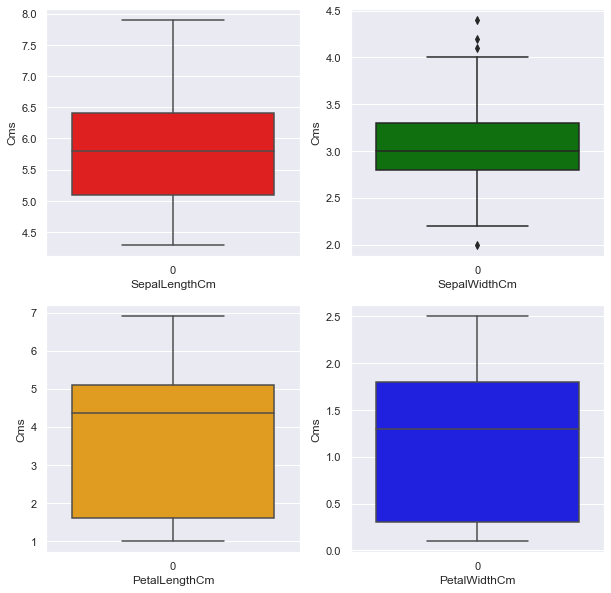

In [8]:
data.drop(columns=['Id'],axis=1,inplace=True)
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data=data['SepalLengthCm'], ax=axes[0, 0], color='red').set(xlabel='SepalLengthCm',ylabel="Cms")
sns.boxplot(data=data['SepalWidthCm'], ax=axes[0, 1],color='green').set(xlabel='SepalWidthCm',ylabel="Cms")
sns.boxplot(data=data['PetalLengthCm'], ax=axes[1, 0],color='orange').set(xlabel='PetalLengthCm',ylabel="Cms")
sns.boxplot(data=data['PetalWidthCm'], ax=axes[1, 1],color='blue').set(xlabel='PetalWidthCm',ylabel="Cms")
plt.show()

### From the above box plot we can see the attribute "SepalWidthCm" has outliers

## Treating outliers

In [9]:
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)
IQLR = Q3-Q1
lower_limit = Q1 - 1.5*IQLR
upper_limit = Q3 + 1.5*IQLR

def treat_outliers(x):
    if x<lower_limit: return lower_limit
    if x>upper_limit: return upper_limit
    else: return x
    
data['SepalWidthCm'] = data['SepalWidthCm'].apply(treat_outliers)


### Visualizing boxplot of "'SepalWidthCm" after removing outliers

[Text(0.5, 0, 'SepalWidthCm'), Text(0, 0.5, 'Cms')]

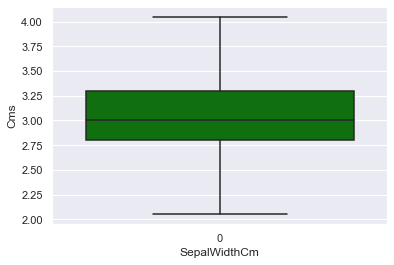

In [10]:
sns.boxplot(data=data['SepalWidthCm'],color='green').set(xlabel='SepalWidthCm', ylabel="Cms")


### "SepalWidthCm" is now free from outliers

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [13]:
scaled_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-5.210647e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.373367e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.945275e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.201705e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.913651e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,2.370204e+00,1.786341e+00,1.710902e+00


# Creating Clusters

In [14]:
from sklearn.cluster import KMeans

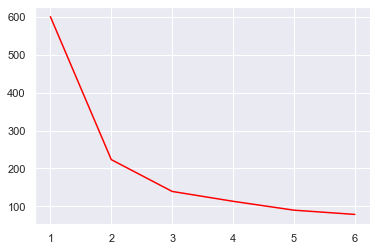

In [15]:
WCSS = []
for i in range(1,7):
    model = KMeans(n_clusters=i,init='k-means++',max_iter=400,  n_init=10,random_state=0)
    model.fit(scaled_data)
    WCSS.append(model.inertia_)

plt.plot(range(1, 7), WCSS, color='red')
plt.show()


### Using elbow method it can be concluded that the optimal numbers of clusters are 3

## Training Model with 3 clusters

In [16]:
colorMap = {1:'r',2:'g',3:'blue'}
model = KMeans(n_clusters=3,init='k-means++',max_iter=400,  n_init=10,random_state=0)
model.fit(scaled_data)
y_kmeans =  model.predict(scaled_data)
scaled_data['class'] = y_kmeans
scaled_data['color'] = scaled_data['class'].map(lambda x:colorMap[x+1])

<IPython.core.display.Javascript object>


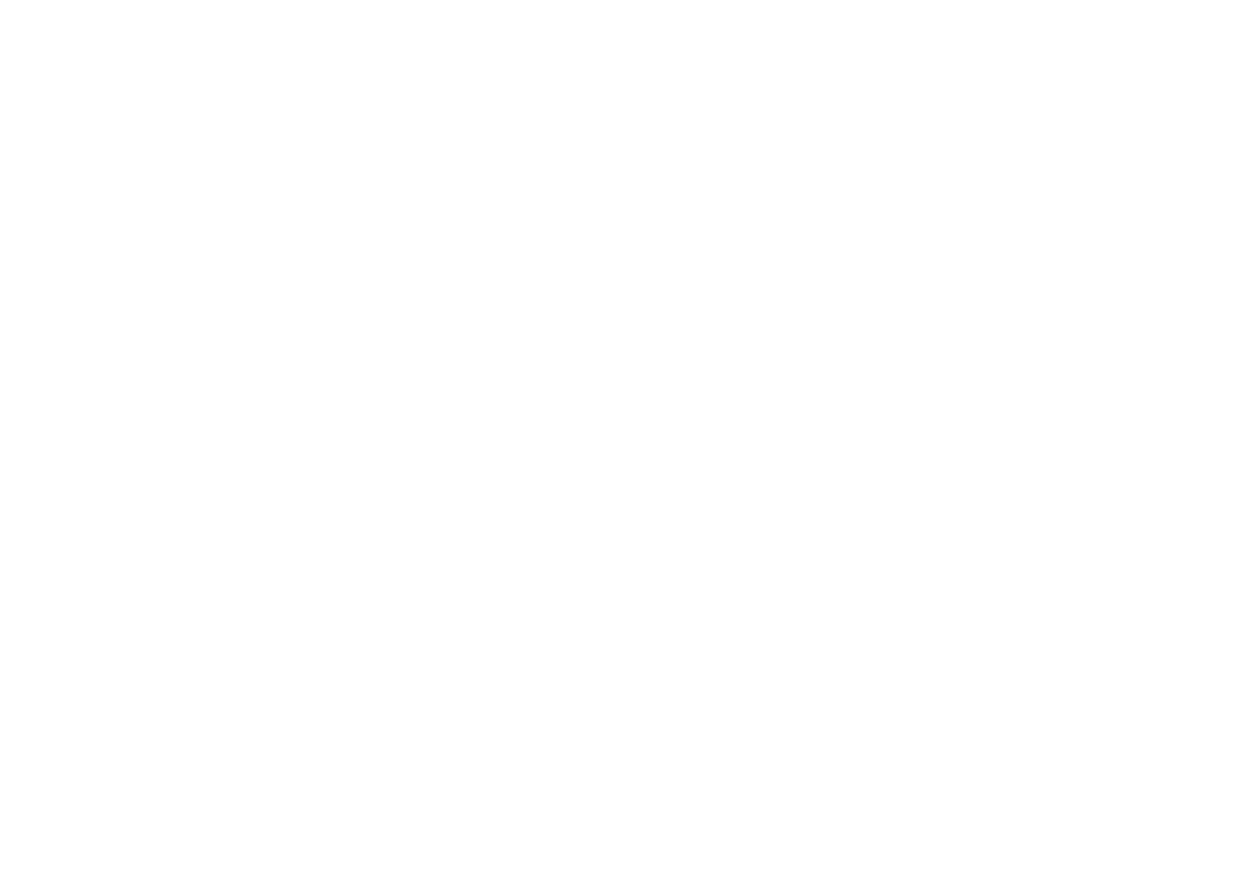

In [20]:
%matplotlib notebook
c1=model.cluster_centers_[0]
c2=model.cluster_centers_[1]
c3=model.cluster_centers_[2]
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(scaled_data['SepalLengthCm'][scaled_data['class']==0],
             scaled_data['SepalWidthCm'][scaled_data['class']==0], 
             scaled_data['PetalLengthCm'][scaled_data['class']==0],
             c=scaled_data['color'][scaled_data['class']==0],alpha=1,label='class 0')

ax.scatter3D(scaled_data['SepalLengthCm'][scaled_data['class']==1],
             scaled_data['SepalWidthCm'][scaled_data['class']==1], 
             scaled_data['PetalLengthCm'][scaled_data['class']==1],
             c=scaled_data['color'][scaled_data['class']==1],alpha=1,label='class 1')

ax.scatter3D(scaled_data['SepalLengthCm'][scaled_data['class']==2],
             scaled_data['SepalWidthCm'][scaled_data['class']==2], 
             scaled_data['PetalLengthCm'][scaled_data['class']==2],
             c=scaled_data['color'][scaled_data['class']==2],alpha=1,label='class 2')
plt.legend()           
plt.show()
%matplotlib notebook

<IPython.core.display.Javascript object>


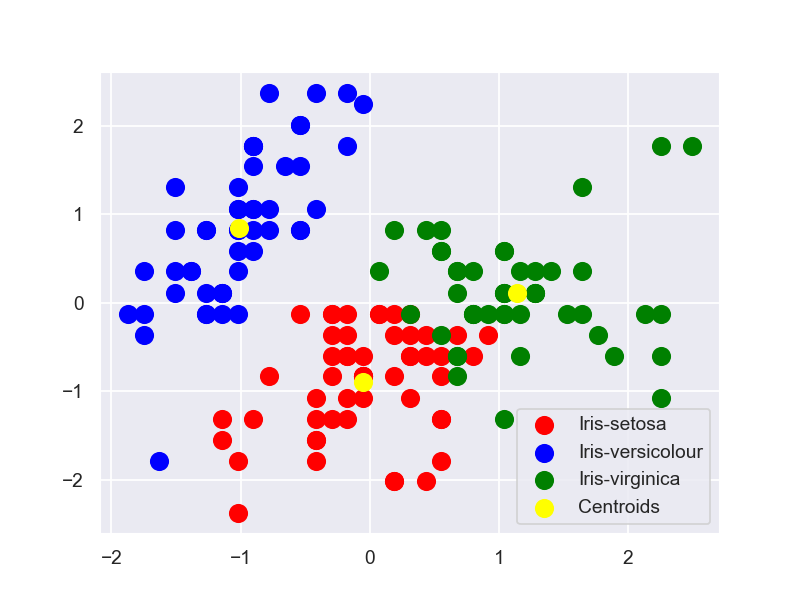

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(scaled_data.iloc[y_kmeans == 0, 0], scaled_data.iloc[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_data.iloc[y_kmeans == 1, 0], scaled_data.iloc[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_data.iloc[y_kmeans == 2, 0], scaled_data.iloc[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
